In [3]:
!git clone https://github.com/nicholas-leonard/word2vec.git

Cloning into 'word2vec'...
remote: Enumerating objects: 139, done.
remote: Total 139 (delta 0), reused 0 (delta 0), pack-reused 139 (from 1)
Receiving objects: 100% (139/139), 117.30 KiB | 566.00 KiB/s, done.
Resolving deltas: 100% (79/79), done.


In [4]:
!make -C word2vec word2vec

make: Entering directory '/home/joaovam/projects/ufmg/NLP/NLP_TPs/TP1/word2vec'
gcc word2vec.c -o word2vec -lm -pthread -O3 -march=native -Wall -funroll-loops -Wno-unused-result
make: Leaving directory '/home/joaovam/projects/ufmg/NLP/NLP_TPs/TP1/word2vec'


In [15]:
!wget  "http://mattmahoney.net/dc/text8.zip"
!unzip text8.zip

--2024-11-14 09:48:46--  http://mattmahoney.net/dc/text8.zip
Resolving mattmahoney.net (mattmahoney.net)... 34.198.1.81
Connecting to mattmahoney.net (mattmahoney.net)|34.198.1.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31344016 (30M) [application/zip]
Saving to: ‘text8.zip.1’

text8.zip.1         100%[===================>]  29.89M  11.4MB/s    in 2.6s    

2024-11-14 09:48:49 (11.4 MB/s) - ‘text8.zip.1’ saved [31344016/31344016]

Archive:  text8.zip
  inflating: text8                   


In [1]:
WORD_2_VEC = "./word2vec/word2vec"
CORPUS = "text8"
ANALOGY_FILE = "word2vec/questions-words.txt"

In [9]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def cossine_distance(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


In [5]:
def trainW2V(train_file,window, embedding_size, iter, cbow):

    command = [WORD_2_VEC, "-train", f"{train_file}", "-window", f"{window}", "-iter", f"{iter}", "-size", f"{embedding_size}", "-cbow",f"{1 if cbow else 0}", "-output", f"out.txt"]
    print("Running ", command)
    subprocess.run(command,
                capture_output=False,
                text=True)
    

In [6]:

def load_model(model):
    model_dict = {}
    with open(model, "r", encoding="utf-8") as file:
        for l in file:
            l = l.strip().split(" ")
            model_dict[l[0]] = np.array(l[1:], dtype=float)
    return model_dict


In [ ]:
def compute_acc(model_file):
    model = load_model(model_file)
    distances = []
    with open(ANALOGY_FILE, "r", encoding="utf-8") as file:
        file.readline()
        for l in file:
            #print(l)
            if not l.startswith(":"):    
                #print(l)
                c1,c2,c3,c4 = l.strip().split(" ")
                
                #print(c1, c2, c3, c4)
                #print(model[c1] + model[c2] - model[c3], model[c4])
                if c1.lower() in model and c2.lower() in model and c3.lower() in model and c4.lower() in model:
                    distances.append(cossine_distance(model[c1.lower()] + model[c2.lower()] - model[c3.lower()], model[c4.lower()]))
    return np.mean(distances)

Definimos os possívels valores para os parâmetros de teste como:
- `Cbow`: Verdadeiro ou falso.
- `Iterações`: 3, 5 ou 10 iterações.
- `Janela`: 1, 5 ou 7 palavras.
- `Embedding`: 50, 100, 200 valores.

In [8]:
cbow = [True, False]
iter = [3, 5, 10]
window = [1, 7, 15]
embedding_size = [50, 100, 200]
models = {}
for e in embedding_size:
    for w in window:
        for i in iter:
            for c in cbow:
                curr = str([c,w,e,i])
                
                trainW2V(CORPUS, w, e, i, c)
                acc = compute_acc("out.txt")
                print("Model:", curr)
                print("Accuracy:", acc)
                models[curr] = acc



Running  ['./word2vec/word2vec', '-train', 'text8', '-window', '1', '-iter', '3', '-size', '50', '-cbow', '1', '-output', 'out.txt']
Starting training using file text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000008  Progress: 100.02%  Words/thread/sec: 535.12k  Model: [True, 1, 50, 3]
Accuracy: 0.3054448716459725
Running  ['./word2vec/word2vec', '-train', 'text8', '-window', '1', '-iter', '3', '-size', '50', '-cbow', '0', '-output', 'out.txt']
Starting training using file text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000002  Progress: 100.05%  Words/thread/sec: 442.80k  Model: [False, 1, 50, 3]
Accuracy: 0.4282643861715778
Running  ['./word2vec/word2vec', '-train', 'text8', '-window', '1', '-iter', '5', '-size', '50', '-cbow', '1', '-output', 'out.txt']
Starting training using file text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000005  Progress: 100.03%  Words/thread/sec: 545.33k  Model: [True, 1, 50, 5]
Accuracy: 0.2680955864068304
Run

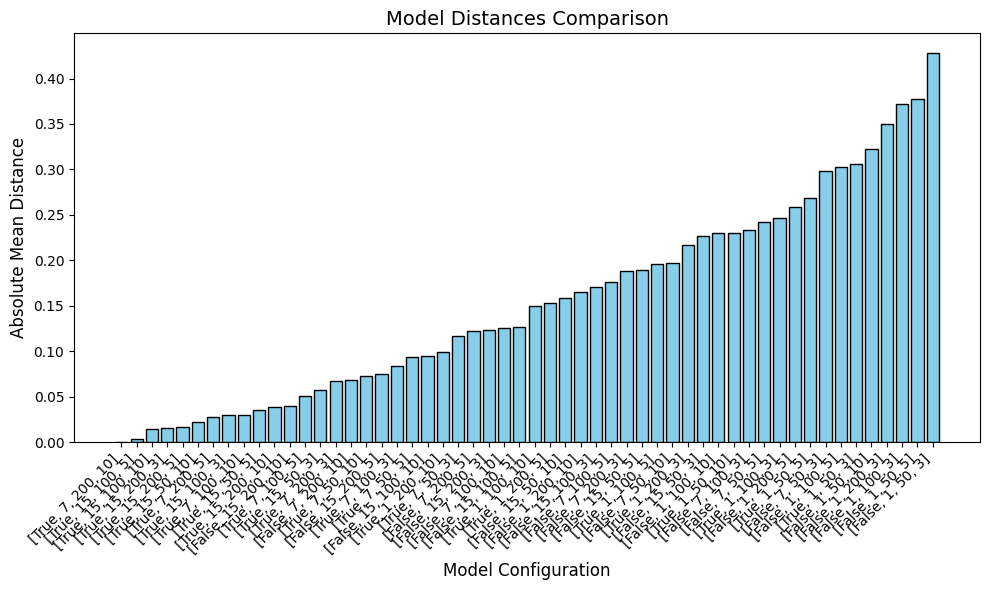

In [ ]:
processed_results = [
    (key, abs(value)) for key, value in models.items()
]
processed_results.sort(key=lambda x: abs(x[1]))  

labels = [key for key, _ in processed_results]
accuracies = [value for _, value in processed_results]


plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='skyblue', edgecolor='black')


plt.xlabel('Model Configuration', fontsize=12)
plt.ylabel('Absolute Mean Distance', fontsize=12)
plt.title('Model Distances Comparison', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()


plt.show()

Acima temos o resultado para cada um dos 54 possíveis modelos, no eixo x temos a configuração do modelo no formato `[Cbow, Window, Embedding Size, Interations]`. No eixo y temos a distância média absoluta.

Os valores variaram desde o melhor modelo com 0.00068 de distância média até o pior modelo com 0.42 de distância.


In [27]:
#Melhor modelo
print(models[str([True,7,200,10])])

#Pior modelo
print(models[str([False,1,50,3])])


0.0006852516288807002
0.4282643861715778
